# Assignment 1: Weather

The file `weather.csv`, available on Canvas, originally from [the CORGIS dataset project](https://corgis-edu.github.io/corgis/csv/weather/), contains weather reports from various weather stations across the United States. In this assignment, we practise the use of some basic data science Python libraries using the data in question.

## General instructions
- Do not rename the dataset file `weather.csv`; the file is available on the autograder precisely under that name.
- Do not remove the `# Codegrade Tag comments`; they are used by the autograder to locate important code cells. Removing them will cause the grading to fail.
- Do not include your name, person number, or any other such personally identifiable material in your answers. For the purpose of grading, your submissions by their metadata.
- Do not use generative AI to generate answers. While generative AI can be a great tool to improve productivity, one must become proficient first oneself in order to make good use of it.
- Do not copy snippets of code from the Internet without attributing them (add an appropriate reference).
- Do **not** copy other students' code. You may discuss your solutions with your classmates but you are not allowed to copy their code.
- Related to above, do **not** publish your code. Do not submit your solutions to a public GitHub repository, for example.
- If you fail to comply with the rules regarding plagiarism above, you will be reported to the unversity disciplinary board and may be suspended.

## Question 1: Importing tools

For this assignment, we are going to need the following libraries: NumPy, Matplotlib, and Pandas.

Import all three libraries using their standard aliases. Write your answer in the following cell. Do not remove the magical CodeGrade tag comment.

In [15]:
# Codegrade Tag Question1
# Do *not* remove the tag above
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## Question 2: Reading data

Use Pandas to read the dataset `weather.csv` into a Pandas dataframe called `df`.

In [ ]:
# Codegrade Tag Question2
# Do *not* remove the tag above
df = pd.read_csv('weather.csv')

## Question 3: Unit conversion

The column `Data.Temperature.Avg Temp` contains the daily average temperature at the station in Fahrenheit. Add a new column to `df` called `Average Temperature Celsius` that contains the daily average temperature in celsius. Likewise, the column `Data.Precipitation` contains the amount of rainfall in inches. Add a column to `df` called `Precipitation mm` that contains the precipitation in millimetres.

**Note.** You are supposed to do this using array operations. You must not use a `for` or a `while` loop.

**Hint.** If you can't remember how to convert between °F and °C, see [the Wikipedia article](https://en.wikipedia.org/wiki/Fahrenheit#Conversion_(specific_temperature_point)). If you can't remember how to convert between inches and millimetres, see [the Wikipedia article](https://en.wikipedia.org/wiki/Inch).

In [ ]:
# Codegrade Tag Question3
# Do *not* remove the tag above

df['Average Tempature Celcius'] = df(["Data.Temperature.Avg Temp"] +40 )/1.8 -40

## Question 4
Create a new dataframe called `df_sf` that contains only observations from San Francisco. Then, create a line plot of the daily average temperature (in °C) as a function of the date using matplotlib.

That is, you should produce a plot that
- has date on the $x$-axis,
- the temperature on the $y$-axis,
- has a descriptive title (the title should mention that the mesurements are from San Francisco, so the title is assumed to contain the string `San Francisco`),
- has labelled axes (including the unit on the $y$-axis); the $x$-axis label is assumed to contain the string `Date` and the $y$-axis label the strings `Temperature` and `°C`.

**Hints.**
By default, the content of the date column is treated as strings. This will create very awkward ticks on the $x$-axis. This can be fixed by converting the dates into actual date objects using `pd.to_datetime`.

In [ ]:
# Codegrade Tag Question4
# Do *not* remove the tag above

date_list = []
temp_list = []

for row in df[["Data.Precipitation", "Data.Temperature.Avg Temp", "Station.Code"]].iterrows():
    if row["Station.code"] == 'SFO':
        date_list.append(pd.to_datetime(row["Data.Precipitation"]))
        temp_list.append(row["Data.Temperature.Avg Temp"])

dates = np.array(date_list)
temps = np.array(temp_list)
plt.plot(dates, temps)
plt.title('San Francisco')
plt.xlabel('Date')
plt.ylabel('Temperature in *C')
plt.show()




## Question 5

The data we have has been provided for us in long format, that is, we have one one row per observation, and each row contains several variables (this could be in an even longer format if we had a column that would indicate the variable in question and then another contain would contain the value of said variable).

Let us create two dataframes that contain a wide format for one variable in different cities. We will construct the following data frames:
- `df_aktxma` contains only observations from *Anchorage, AK*, *Boston, MA*, and *Dallas-Fort Worth, TX*. The format is otherwise exactly the same as in `df` and we use this to construct the next two dataframes.
- `df_aktxma_temperature` contains exactly three columns: one corresponding to Anchorage, AK, one to Boston, MA, and one to Dallas-Fort Worth, TX. The columns record the daily average temperature. The index of the dataframe is the date. The index must be in `datetime64[ns]` format (**not** as strings). The columns must be flat (single-level), not hierarchical.
- `df_aktxma_precipitation` is just like above, but contains the precipitation in millimetres instead.

**Hints.**
- `pivot` is a useful method for *pivoting* the data as we want to do here.
- A hierarchical column index can be flattened with the method `get_level_values`.
- The index can be converted into the correct data type with `pd.to_datetime`.

In [48]:
# Codegrade Tag Question5
# Do *not* remove the tag above

df_aktxma = df[(df["Station.City"] == "Anchorage")| (df["Station.City"] == "Boston") | (df["Station.City"] == "Dallas-Fort Worth")].copy()
df_aktxma["Date.Full"] = pd.to_datetime(df_aktxma["Date.Full"])


df_aktxma_temperature = df_aktxma.pivot(
    index="Date.Full",
    columns="Station.Code",
    values="Data.Temperature.Avg Temp"
)

df_aktxma_precipitation = df_aktxma.pivot(
    index="Date.Full",
    columns="Station.Code",
    values="Data.Precipitation"
)


## Question 6
Plot the content of `df_aktxma_temperature`. That is, plot three lines that show the daily average temperature in the three different cities.

Technical requirements:
- There must be three distinct lines in the same plot,
- There must be a **legend** that tells which line corresponds to which city,
- The date is on the $x$-axis and the label includes the string `Date`,
- The temperature is on the $y$-axis and the label includes the strings `Temperature` and `°C`,
- There is a descriptive title.

**Caveat.**
Although it is possible to add a legend with `plt.legend(['text'])`, you should instead add a **label** when plotting lines. This is because it is very difficult to extract free-standing legends, and it is also good practice to label your lines (then there's a clear correspondence between the drawings and the label information). So, in short, don't do
```
plt.plot(x,y)
plt.legend(['a nice curve'])
```
instead, do
```
plt.plot(x,y,label='a nice curve')
plt.legend()
```
This holds for other questions where a legend is requested as well.

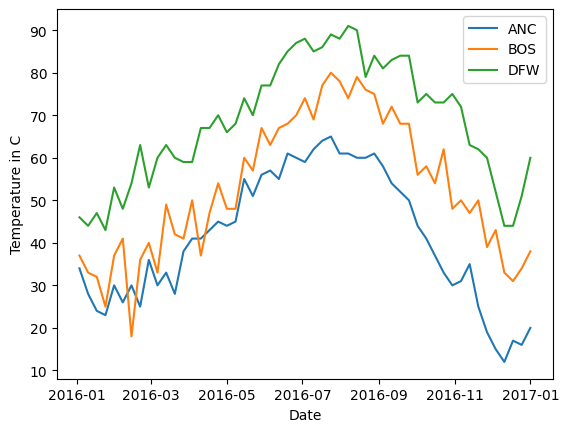

In [ ]:
# Codegrade Tag Question6
# Do *not* remove the tag above

for city in df_aktxma_temperature.columns:
    plt.plot(df_aktxma_temperature.index, df_aktxma_temperature[city], label=city)



plt.xlabel("Date")
plt.ylabel("Temperature in Celsius")
plt.legend()
plt.show()

    

## Question 7
Do the same but with the content of `df_aktxma_precipitation`. That is, plot three lines that show the daily precipitation in the three different cities.

Technical requirements:
- There must be three distinct lines in the same plot,
- There must be a **legend** that tells which line corresponds to which city,
- The date is on the $x$-axis and the label includes the string `Date`,
- The precipitation is on the $y$-axis and the label includes the strings `Precipitation` and `mm`,
- There is a descriptive title.

159


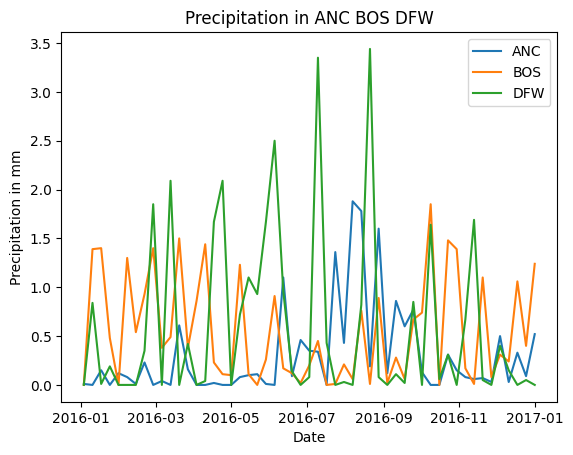

In [ ]:
# Codegrade Tag Question7
# Do *not* remove the tag above

for city in df_aktxma_precipitation.columns:
    plt.plot(df_aktxma_precipitation.index, df_aktxma_precipitation[city], label=city)



plt.xlabel("Date")
plt.ylabel("Precipitation in mm")
plt.title("Precipitation in ANC BOS DFW")
plt.legend()
plt.show()

## Question 8

Discuss the two plots above. What does this tell about the climate of the cities? How similar are they, and how do they differ? Why? Find out and dicuss *shortly*.

(You are expected to write 3-4 paragraphs, not more; the discussion should be meaningful, but remember that this is not a class in meteorology.)

*Write your answer in this cell*

In [ ]:
#Hotter and more precipitation in texas. In anchorage the climate is cooler and less rain, boston somewhere between. As the data contains 159 points of measurements, this is just a small sample.